In [130]:
!pip install torch

In [131]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


In [132]:
data=pd.read_csv('D:/인공지능개론/BP_data.csv') 

In [133]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [134]:
print(data.isnull().sum()) #결측치 확인

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [135]:
data['Pregnancy']=data['Pregnancy'].fillna(0) #특정 칼럼의 특정 값을 바꾸는 방법
print(data.isnull().sum())

Patient_Number                     0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient      92
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day      242
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64


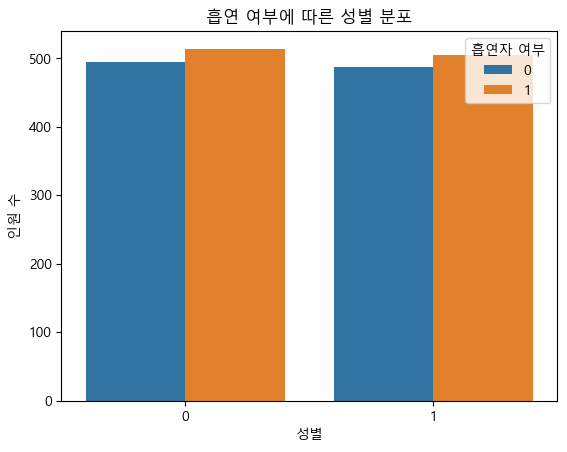

In [136]:
#카운트 플롯 (2개 이상)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지


sns.countplot(x='Sex', hue='Smoking', data=data)
plt.title('흡연 여부에 따른 성별 분포')
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.legend(title='흡연자 여부')
plt.show()

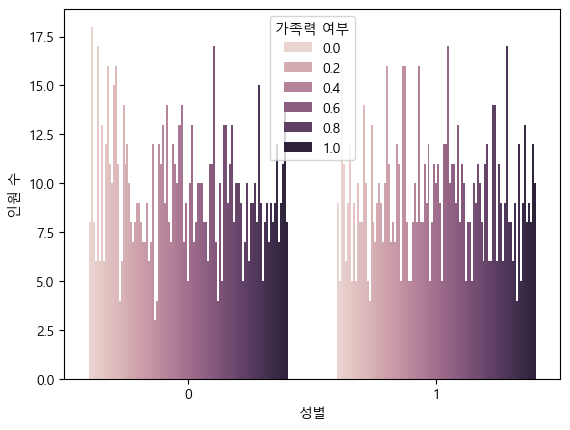

In [137]:
sns.countplot(x='Sex', hue='Genetic_Pedigree_Coefficient', data=data)
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.legend(title='가족력 여부')
plt.show()

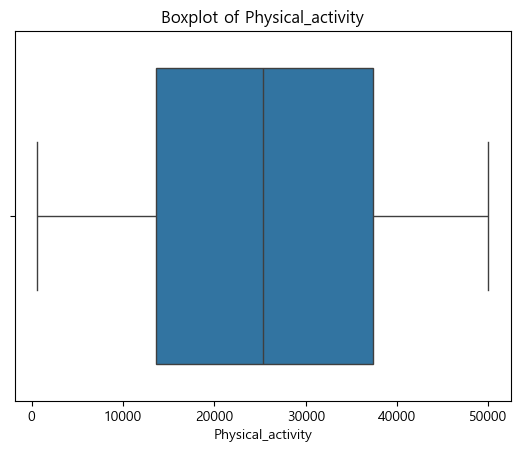

In [138]:
#박스 플롯
sns.boxplot(x=data['Physical_activity'].dropna())

plt.title('Boxplot of Physical_activity')
plt.xlabel('Physical_activity')
plt.show()

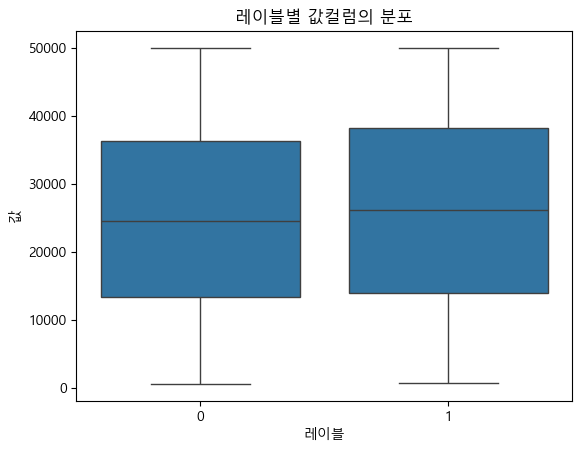

In [139]:
#레이블 값에 따라서 특정 컬럼의 범위를 보여주는 박스플롯 소스코드

sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)
plt.title('레이블별 값컬럼의 분포')
plt.xlabel('레이블')
plt.ylabel('값')
plt.show()

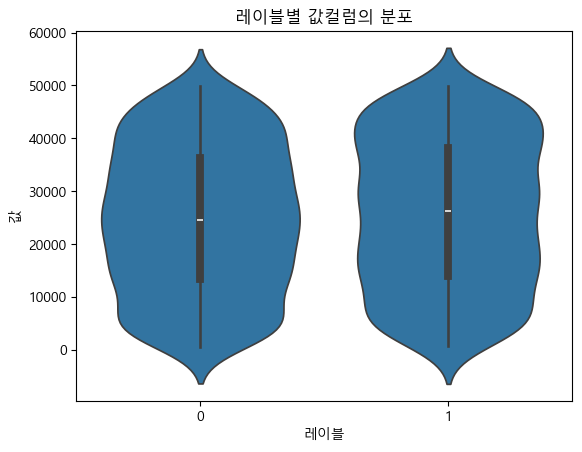

In [140]:
#레이블 값에 따라서 특정 컬럼의 범위를 보여주는 바이올린 플롯 코드

sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)
plt.title('레이블별 값컬럼의 분포')
plt.xlabel('레이블')
plt.ylabel('값')
plt.show()

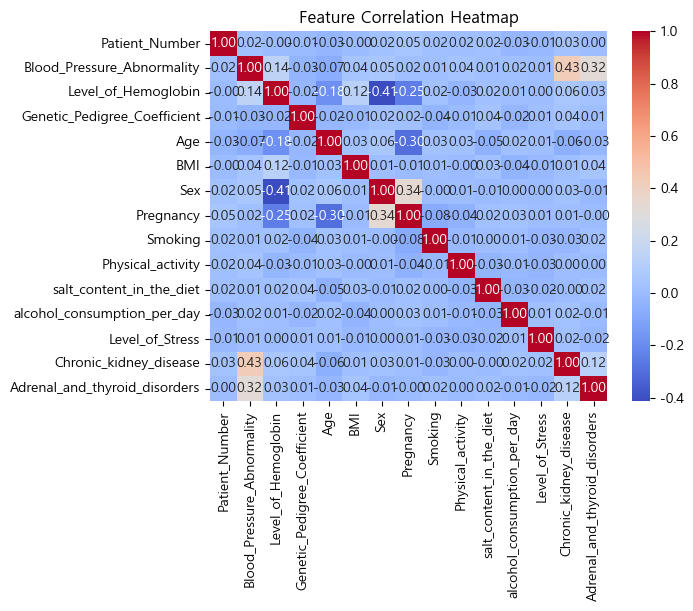

In [141]:
#히트맵
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr = data.corr(numeric_only=True)

# 히트맵 그리기
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


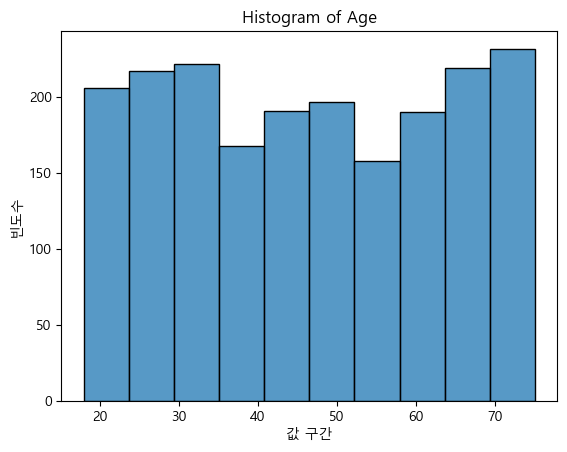

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data, x='Age', bins=10, kde=False)  # kde=True면 밀도곡선도 같이 표시
plt.title('Histogram of Age')
plt.xlabel('값 구간')
plt.ylabel('빈도수')
plt.show()

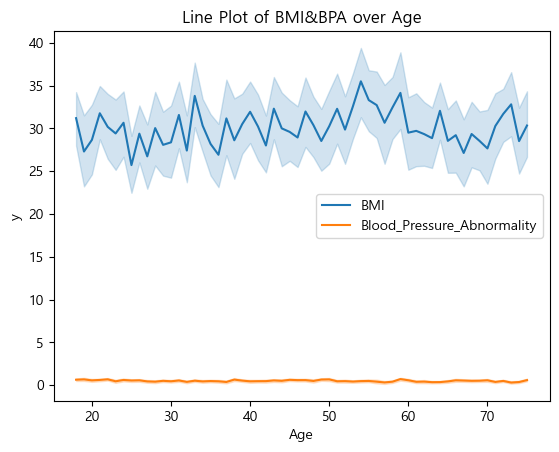

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=data, x='Age', y='BMI', label='BMI')
sns.lineplot(data=data, x='Age', y='Blood_Pressure_Abnormality', label='Blood_Pressure_Abnormality')
plt.title('Line Plot of BMI&BPA over Age')
plt.xlabel('Age')
plt.ylabel('y')
plt.show()

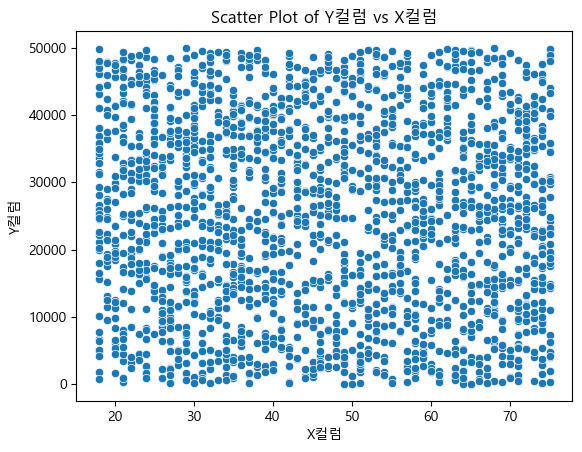

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='Age', y='salt_content_in_the_diet')
plt.title('Scatter Plot of Y컬럼 vs X컬럼')
plt.xlabel('X컬럼')
plt.ylabel('Y컬럼')
plt.show()

In [145]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [146]:
columns=['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']

In [147]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [148]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,0,1,296,90,16,13,1,1,0,1798,1880,488,1,1,1
1,1,0,146,23,36,23,1,0,0,1006,987,199,2,0,0
2,2,1,248,91,52,39,0,0,0,361,1152,63,1,1,0
3,3,0,269,43,53,40,0,0,0,383,286,235,0,1,0
4,4,1,553,83,34,9,0,0,0,570,1937,389,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1,184,2,51,16,1,0,1,1007,1862,139,2,1,0
1996,1996,1,345,100,6,35,1,1,1,69,312,488,2,1,1
1997,1997,1,727,22,0,32,0,0,0,550,961,488,1,1,1
1998,1998,0,283,72,28,35,1,0,1,684,586,246,2,0,1


In [149]:

# 데이터와 타겟 분리
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [150]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [152]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [153]:

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [155]:
class BPDense(nn.Module):
    def __init__(self):
        super(BPDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPDense()

In [156]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [157]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1.0284, Accuracy: 63.75%
Epoch 2/20, Loss: 0.6195, Accuracy: 75.25%
Epoch 3/20, Loss: 0.5437, Accuracy: 75.00%
Epoch 4/20, Loss: 0.5187, Accuracy: 73.00%
Epoch 5/20, Loss: 0.4984, Accuracy: 77.75%
Epoch 6/20, Loss: 0.4805, Accuracy: 78.25%
Epoch 7/20, Loss: 0.4579, Accuracy: 76.75%
Epoch 8/20, Loss: 0.4357, Accuracy: 78.50%
Epoch 9/20, Loss: 0.4159, Accuracy: 80.50%
Epoch 10/20, Loss: 0.3970, Accuracy: 82.25%
Epoch 11/20, Loss: 0.3784, Accuracy: 84.00%
Epoch 12/20, Loss: 0.3641, Accuracy: 85.00%
Epoch 13/20, Loss: 0.3518, Accuracy: 85.00%
Epoch 14/20, Loss: 0.3377, Accuracy: 85.25%
Epoch 15/20, Loss: 0.3319, Accuracy: 85.75%
Epoch 16/20, Loss: 0.3219, Accuracy: 87.25%
Epoch 17/20, Loss: 0.3142, Accuracy: 86.00%
Epoch 18/20, Loss: 0.3136, Accuracy: 85.75%
Epoch 19/20, Loss: 0.3038, Accuracy: 85.50%
Epoch 20/20, Loss: 0.2979, Accuracy: 87.50%
Training complete.


In [158]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[177  31]
 [ 19 173]]
F1 Score: 0.88
Precision: 0.88
Recall: 0.88
Specificity: 0.88


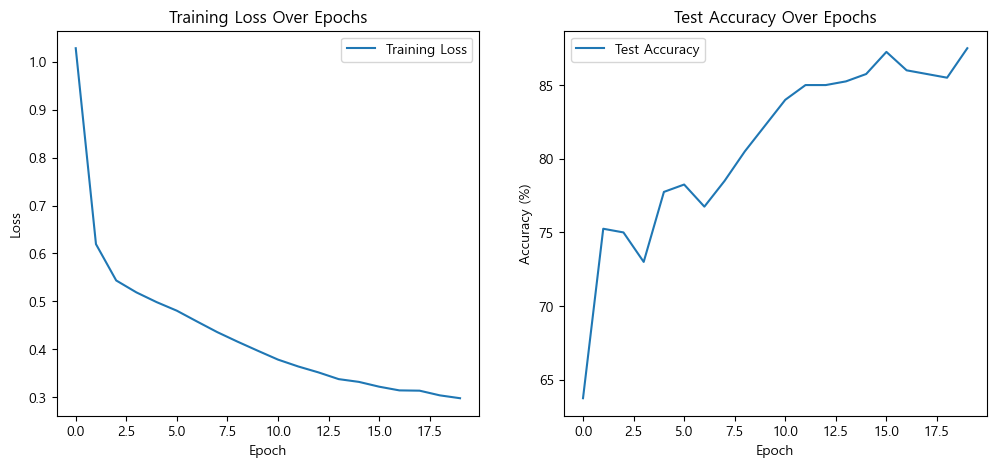

In [159]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [160]:
# 데이터와 타겟 분리
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [161]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [162]:
data_array = np.hstack((X, y.reshape(-1, 1)))

In [163]:
data_array.shape

(2000, 15)

In [164]:
# Split sequences function
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Apply sequence transformation
n_steps = 5
X, y = split_sequences(data_array, n_steps)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1596, 5, 14), (1596,), (400, 5, 14), (400,))

In [166]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [167]:
# Define the 1D CNN model
class BPCNN(nn.Module):
    def __init__(self):
        super(BPCNN, self).__init__()
        self.conv1 = nn.Conv1d(14, 16, kernel_size=3, padding=1)  # Change input channels to 6
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 5, 64)  # Adjust the linear layer input size accordingly
        self.fc2 = nn.Linear(64, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [168]:
# Initialize the model, loss function, and optimizer
model = BPCNN()

In [169]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

Epoch 1/20, Loss: 0.9009, Accuracy: 60.25%
Epoch 2/20, Loss: 0.6610, Accuracy: 54.25%
Epoch 3/20, Loss: 0.5847, Accuracy: 69.25%
Epoch 4/20, Loss: 0.5485, Accuracy: 70.75%
Epoch 5/20, Loss: 0.5133, Accuracy: 70.50%
Epoch 6/20, Loss: 0.4996, Accuracy: 68.50%
Epoch 7/20, Loss: 0.4847, Accuracy: 69.00%
Epoch 8/20, Loss: 0.4747, Accuracy: 70.25%
Epoch 9/20, Loss: 0.4553, Accuracy: 70.25%
Epoch 10/20, Loss: 0.4369, Accuracy: 70.50%
Epoch 11/20, Loss: 0.4216, Accuracy: 71.00%
Epoch 12/20, Loss: 0.4013, Accuracy: 69.75%
Epoch 13/20, Loss: 0.3846, Accuracy: 71.75%
Epoch 14/20, Loss: 0.3626, Accuracy: 70.50%
Epoch 15/20, Loss: 0.3436, Accuracy: 71.00%
Epoch 16/20, Loss: 0.3250, Accuracy: 71.25%
Epoch 17/20, Loss: 0.3118, Accuracy: 72.25%
Epoch 18/20, Loss: 0.2957, Accuracy: 72.75%
Epoch 19/20, Loss: 0.2792, Accuracy: 73.50%
Epoch 20/20, Loss: 0.2666, Accuracy: 71.50%
Training complete.
Confusion Matrix:
[[130  75]
 [ 39 156]]
F1 Score: 0.71
Precision: 0.72
Recall: 0.71
Specificity: 0.72


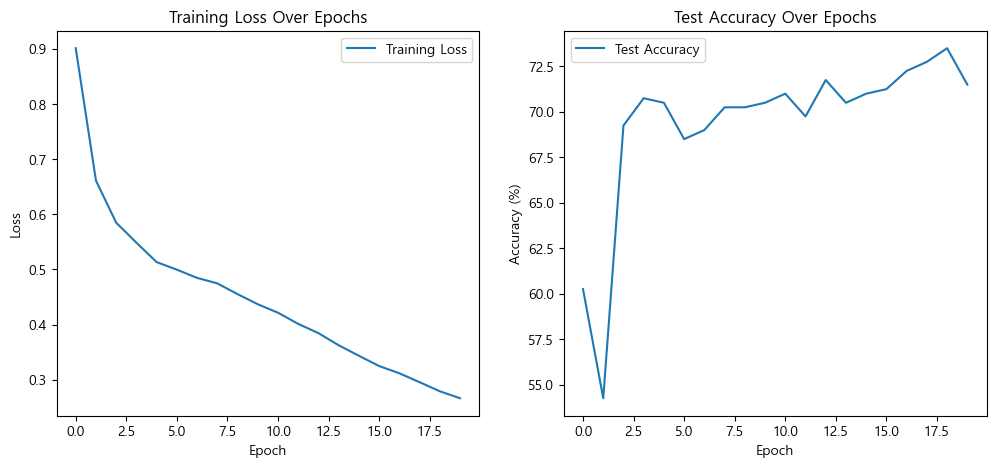

In [170]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        inputs = inputs.permute(0, 2, 1)  # Change shape to (batch_size, channels, sequence_length)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.permute(0, 2, 1)  # Change shape to (batch_size, channels, sequence_length)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# Print metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()